In [83]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries
import talipp.indicators as ta
from talipp.ohlcv import OHLCV
import openai
import regex as re
import os
from dotenv import load_dotenv
import requests

load_dotenv()

True

In [84]:
ALPHA_VANTAGE_API_KEY = os.getenv('ALPHA_VANTAGE_API_KEY')
openai.api_type = "azure"
openai.api_base = os.getenv('AZURE_OPENAI_ENDPOINT')
openai.api_version = os.getenv("OPENAI_API_VERSION")
openai.api_key = os.getenv('AZURE_OPENAI_API_KEY')

In [85]:
def fetchStockDataOffline(symbol):
    data = pd.read_csv(f'{symbol}.csv')
    data.index = data['Unnamed: 0']
    data.drop(['Unnamed: 0'],axis=1,inplace=True)
    return data

In [88]:
data = fetchStockDataOffline('IBM')

In [89]:
pairs = [['IBM',345],['GOOG',45.8]]

In [90]:
def get_weighted_data(pairs):
    """Fetch daily stock data for the past 100 days from Alpha Vantage."""

    num_stocks = len(pairs)
    total_quantity = 0
    for i in range(num_stocks):

        total_quantity += pairs[i][1]

        if i==0:
            data = fetchStockDataOffline(pairs[i][0]) * pairs[i][1]
        else:
            data += fetchStockDataOffline(pairs[i][0]) * pairs[i][1]

    data['Volume'] = data['Volume']/total_quantity
    return data

In [103]:
data = fetchStockDataOffline('IBM')
data

,Open,High,Low,Close,Volume
Unnamed: 0,,,,,
2024-02-02,187.10,187.3900,185.615,185.79,4055411
2024-02-05,185.51,185.7800,183.255,183.42,4379602
2024-02-06,183.55,184.6800,183.040,183.41,3338196
2024-02-07,183.34,184.0200,182.625,183.74,4841188
2024-02-08,182.63,184.5500,181.490,184.36,5161185
...,...,...,...,...,...
2024-06-20,174.08,174.2800,171.220,173.92,4723078
2024-06-21,173.97,174.9600,171.400,172.46,10182025
2024-06-24,175.00,178.4599,174.150,175.01,4864735


In [104]:
data = (data * 10) + (data * 10)

In [105]:
data['Volume'] = data['Volume'] / 20

In [106]:
data

,Open,High,Low,Close,Volume
Unnamed: 0,,,,,
2024-02-02,3742.0,3747.800,3712.3,3715.8,4055411.0
2024-02-05,3710.2,3715.600,3665.1,3668.4,4379602.0
2024-02-06,3671.0,3693.600,3660.8,3668.2,3338196.0
2024-02-07,3666.8,3680.400,3652.5,3674.8,4841188.0
2024-02-08,3652.6,3691.000,3629.8,3687.2,5161185.0
...,...,...,...,...,...
2024-06-20,3481.6,3485.600,3424.4,3478.4,4723078.0
2024-06-21,3479.4,3499.200,3428.0,3449.2,10182025.0
2024-06-24,3500.0,3569.198,3483.0,3500.2,4864735.0


In [76]:
data = get_weighted_data(pairs)

In [81]:
data['Volume'] = data['Volume']/(345+45.8)

In [82]:
data

,Open,High,Low,Close,Volume
Unnamed: 0,,,,,
2024-02-02,71002.262,71239.25400,70365.36100,70671.682,1816.423451
2024-02-05,70597.982,70811.58600,69814.05300,69917.694,1555.531699
2024-02-06,70009.718,70435.29200,69767.81600,69936.228,1166.143535
2024-02-07,69944.596,70219.50000,69656.25674,70108.244,1447.040259
2024-02-08,69738.576,70430.28800,69320.08600,70346.876,1427.438971
...,...,...,...,...,...
2024-06-20,68150.918,68312.89200,67152.76800,68141.518,1307.776811
2024-06-21,68194.492,68720.23586,67288.14800,67754.608,3409.372305
2024-06-24,68677.624,69907.92950,68336.28400,68658.632,1370.557544


yfinance

In [2]:
import yfinance as yf
appl = yf.Ticker("APPL")

In [4]:
appl.ticker

'APPL'

In [45]:
stock_data = yf.Ticker("AAPL")
    # Get historical market data
hist_data = stock_data.history(period="max")

hlcv_data = hist_data[['Open', 'High', 'Low', 'Close', 'Volume']]
hlcv_data.index=hlcv_data.index.strftime('%Y-%m-%d')

In [47]:
hlcv_data

,Open,High,Low,Close,Volume
Date,,,,,
1980-12-12,0.099058,0.099488,0.099058,0.099058,469033600
1980-12-15,0.094320,0.094320,0.093890,0.093890,175884800
1980-12-16,0.087429,0.087429,0.086999,0.086999,105728000
1980-12-17,0.089152,0.089582,0.089152,0.089152,86441600
1980-12-18,0.091737,0.092167,0.091737,0.091737,73449600
...,...,...,...,...,...
2024-07-19,224.820007,226.800003,223.279999,224.309998,49151500
2024-07-22,227.009995,227.779999,223.089996,223.960007,48201800
2024-07-23,224.369995,226.940002,222.679993,225.009995,39960300


In [7]:
import yfinance as yf

def get_hlcv_data(ticker):
    # Fetch the data
    stock_data = yf.Ticker(ticker)
    # Get historical market data
    hist_data = stock_data.history(period="max")
    
    # Select the required columns
    hlcv_data = hist_data[['High', 'Low', 'Close', 'Volume']]
    hlcv_data.index=hlcv_data.index.strftime('%Y-%m-%d')
    return hlcv_data

# Example usage
ticker = "AAPL"  # Replace with your desired ticker
hlcv_data = get_hlcv_data(ticker)
print(hlcv_data)


                  High         Low       Close     Volume
Date                                                     
1980-12-12    0.099488    0.099058    0.099058  469033600
1980-12-15    0.094320    0.093890    0.093890  175884800
1980-12-16    0.087429    0.086998    0.086998  105728000
1980-12-17    0.089582    0.089152    0.089152   86441600
1980-12-18    0.092167    0.091737    0.091737   73449600
...                ...         ...         ...        ...
2024-07-19  226.800003  223.279999  224.309998   49151500
2024-07-22  227.779999  223.089996  223.960007   48201800
2024-07-23  226.940002  222.679993  225.009995   39960300
2024-07-24  224.800003  217.130005  218.539993   61777600
2024-07-25  220.850006  214.619995  217.490005   51328200

[10995 rows x 4 columns]


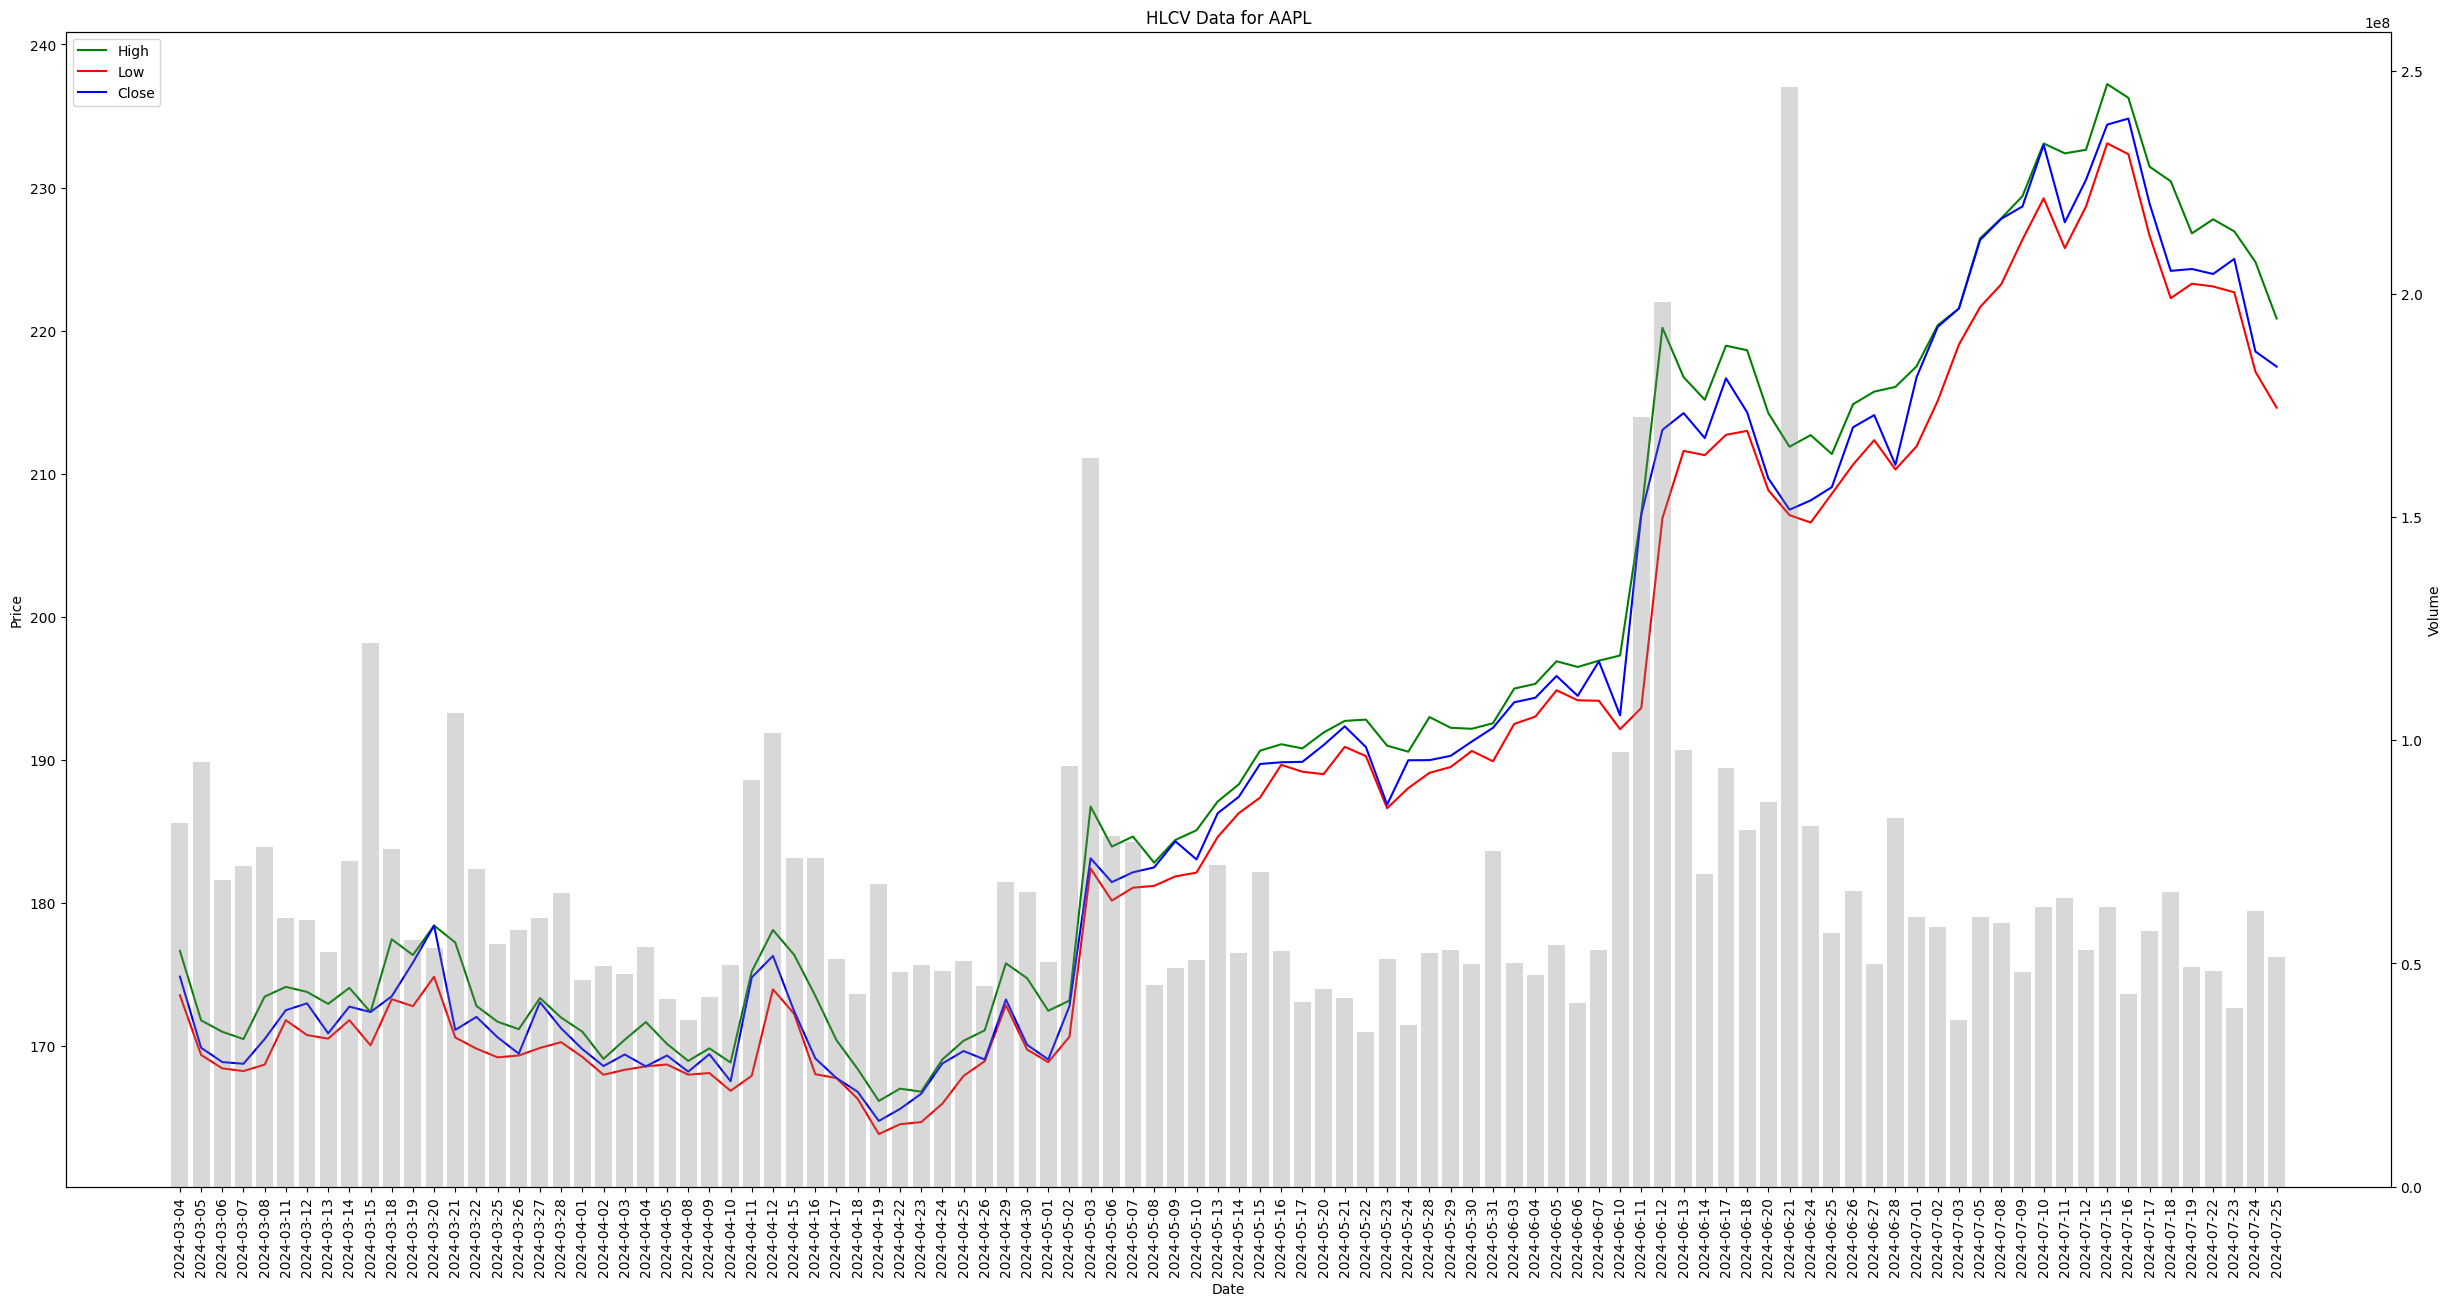

In [22]:
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime

# Fetch HLCV data
def get_hlcv_data(ticker):
    stock_data = yf.Ticker(ticker)
    hist_data = stock_data.history(period="max")
    hlcv_data = hist_data[['Open', 'High', 'Low', 'Close', 'Volume']]
    hlcv_data.index = hlcv_data.index.strftime('%Y-%m-%d')
    return hlcv_data.tail(100)

# Plot HLCV data and save to file
def plot_hlcv(data, ticker, filename):
    fig, ax1 = plt.subplots(figsize=(30, 15))

    # Plot high, low, close
    ax1.plot(data.index, data['High'], label='High', color='g')
    ax1.plot(data.index, data['Low'], label='Low', color='r')
    ax1.plot(data.index, data['Close'], label='Close', color='b')

    ax1.set_xlabel('Date')
    ax1.set_ylabel('Price')
    ax1.set_title(f'HLCV Data for {ticker}')
    ax1.legend(loc='upper left')
    plt.xticks(rotation=90)
    # Create a secondary y-axis for volume
    ax2 = ax1.twinx()
    ax2.bar(data.index, data['Volume'], alpha=0.3, color='gray')
    ax2.set_ylabel('Volume')
    
    # Save the plot to a file
    plt.savefig(filename)
    # plt.show()

# Example usage
ticker = "AAPL"  # Replace with your desired ticker
hlcv_data = get_hlcv_data(ticker)
filename = "hlcv_plot.png"  # Specify the filename and extension
plot_hlcv(hlcv_data, ticker, filename)

In [2]:
import yfinance as yf
def fetchStockData(symbol):
    
    stock_data = yf.Ticker(symbol)
    hist_data = stock_data.history(period="max")
    
    hlcv_data = hist_data[['Open', 'High', 'Low', 'Close', 'Volume']]
    hlcv_data.index = hlcv_data.index.strftime('%Y-%m-%d')
    return hlcv_data.tail(100)

fetchStockData("AAPL")

,Open,High,Low,Close,Volume
Date,,,,,
2024-03-04,175.911389,176.660373,173.554585,174.862823,81510100
2024-03-05,170.528705,171.806970,169.390249,169.889572,95132400
2024-03-06,170.828290,171.008054,168.451508,168.890915,68587700
2024-03-07,168.920878,170.498740,168.261784,168.771088,71765100
2024-03-08,168.771081,173.464712,168.711165,170.498734,76114600
...,...,...,...,...,...
2024-07-19,224.820007,226.800003,223.279999,224.309998,49151500
2024-07-22,227.009995,227.779999,223.089996,223.960007,48201800
2024-07-23,224.369995,226.940002,222.679993,225.009995,39960300


In [28]:
import datetime

s =  '1980-12-12 00:00:00-05:00'
s[:10]

'1980-12-12'

In [ ]:
datetime.strptime()

In [32]:
hlcv_data.index[0]

Timestamp('1980-12-12 00:00:00-0500', tz='America/New_York')

In [20]:
# ALPHA_VANTAGE_API_KEY = "9IPNO0EZ1SWSSHDV"
# import requests
# import pandas as pd

# def fetchStockData(symbol):
#     url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&apikey={ALPHA_VANTAGE_API_KEY}'
#     response = requests.get(url)
#     data = response.json()
#     data = pd.DataFrame(data['Time Series (Daily)']).T
#     data = data.rename(columns={
#         '1. open': 'Open',
#         '2. high': 'High',
#         '3. low': 'Low',
#         '4. close': 'Close',
#         '5. volume': 'Volume'
#     })
#     data = data.sort_index()
#     numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
#     data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric)
#     return data

In [21]:
from dotenv import load_dotenv
load_dotenv()

True

In [ ]:
# symbol = 'APPL'
# url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&apikey={ALPHA_VANTAGE_API_KEY}'
# response = requests.get(url)
# data = response.json()
data = pd.DataFrame(data['Time Series (Daily)']).T
data = data.rename(columns={
    '1. open': 'Open',
    '2. high': 'High',
    '3. low': 'Low',
    '4. close': 'Close',
    '5. volume': 'Volume'
})
data = data.sort_index()
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric)

In [23]:
import base64

In [24]:
def encode_image_to_base64(image_path):
    with open(image_path, "rb") as image_file:
        encoded_string = base64.b64encode(image_file.read()).decode('utf-8')
    return encoded_string

img = encode_image_to_base64("hlcv_plot.png")

In [25]:
img

'iVBORw0KGgoAAAANSUhEUgAAC7gAAAXcCAYAAACyT8NoAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/TGe4hAAAACXBIWXMAAA9hAAAPYQGoP6dpAAEAAElEQVR4nOzdd7SV1Zk/8O8BrhRpoiIYFbABilFsUfkpqIiFCAqKGBtqokkwMyaTTHRmYkuiY6pJrEnEClZEFBEBETRiRVRUisZuRKxIUcrl/v44wzWEi7Rbjvr5rHXWfs+797v3817XMsnM9z63UFFRUREAAAAAAAAAAAAAAKhj9eq6AAAAAAAAAAAAAAAASATcAQAAAAAAAAAAAAAoEQLuAAAAAAAAAAAAAACUBAF3AAAAAAAAAAAAAABKgoA7AAAAAAAAAAAAAAAlQcAdAAAAAAAAAAAAAICSIOAOAAAAAAAAAAAAAEBJEHAHAAAAAAAAAAAAAKAkCLgDAAAAAAAAAAAAAFASBNwBAAAAAAAAAAAAACgJAu4AAAAAAAAAAAAAAJQEAXcAAAAAAAAAAAAAAEqCgDsAAAAAAAAAAAAAACVBwB0AAAAAAAAAAAAAgJIg4A4AAAAAAAAAAAAAQEkQcAcAAAAAAAAAAAAAoCQIuAMAAAAAAAAAAAAAUBIE3AEAAAAAAAAAAAAAKAkC7gAAAAAAAAAAAAAAlAQBdwAAAAAAAAAAAAAASoKAOwAAAAAAAAAAAAAAJUHAHQAAAAAAAAAAAACAkiDgDgAAAAAAAAAAAABASRBwBwAAAAAAAAAAAACgJAi4AwAAAAAAAAAAAABQEgTcAQAAAAAAAAAAAAAoCQLuAAAAAAAAAAAAAACUBAF3AAAAAAAAAAAAAABKgoA7AAAAAAAAAAAAAAAlQcAdAAAAAAAAAAAAAICSIOAOAAAAAAAAAAAAAEBJEHAHAAAAAAAAAAAAAKAkCLgDAAAAAAAAAAAAAFASBNw